In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("inventory_dataset.csv")

In [ ]:
df

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.75,NaN,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,NaN,470.14,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,NaN,460.10,146.0,199.0,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,NaN,NaN,66.0,13.0,145.0,0
4,P0005,Doohickey,Toys,Supplier E,228.75,66.71,903.0,271.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...
995,P0996,Gadget,Electronics,Supplier D,350.37,122.91,186.0,82.0,14.0,0
996,P0997,Widget,Toys,Supplier E,117.17,133.34,497.0,428.0,35.0,0
997,P0998,Widget,Electronics,Supplier C,301.70,241.22,441.0,72.0,62.0,0
998,P0999,Doodad,Toys,Supplier B,139.67,44.92,129.0,310.0,68.0,0


In [ ]:
df.isnull().sum()

,0
Product_ID,0
Product_Name,0
Category,0
Supplier,0
Purchase_Price,269
Sale_Price,259
Quantity_In_Stock,82
Reorder_Level,86
Units_On_Order,102
Discontinued,0


In [ ]:
df["Purchase_Price"]=df["Purchase_Price"].fillna(df["Purchase_Price"].median())

In [ ]:
df["Sale_Price"]=df["Sale_Price"].fillna(df["Sale_Price"].mean())

In [ ]:
df.isnull().sum()

,0
Product_ID,0
Product_Name,0
Category,0
Supplier,0
Purchase_Price,0
Sale_Price,0
Quantity_In_Stock,82
Reorder_Level,86
Units_On_Order,102
Discontinued,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Product_ID,0
Product_Name,0
Category,0
Supplier,0
Purchase_Price,0
Sale_Price,0
Quantity_In_Stock,0
Reorder_Level,0
Units_On_Order,0
Discontinued,0


In [ ]:
y=df["Sale_Price"]

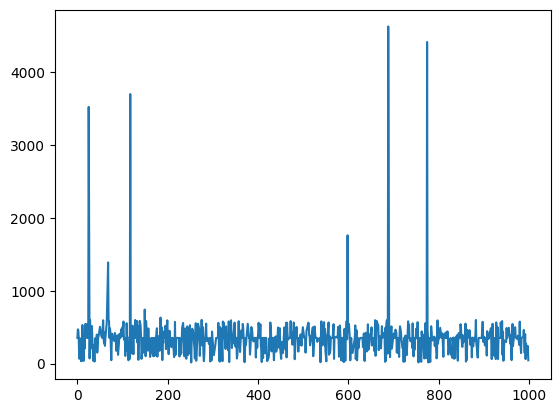

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

In [ ]:
q1=df["Sale_Price"].quantile(0.25)
q3=df["Sale_Price"].quantile(0.75)
print(q1)
print(q3)

220.2875
408.7125


In [ ]:
iqr=q3-q1
print(iqr)
lb=q1-(1.5*iqr)
ub=q3+1.5*iqr
print(lb)
print(ub)

188.42499999999998
-62.349999999999994
691.3499999999999


In [ ]:
import numpy as np
x_sale=np.reshape(df["Sale_Price"],-1)
print(x_sale)

[ 351.92688259  470.14        460.1         351.92688259   66.71
  351.92688259  230.48        267.92         33.22        166.85
   34.7         529.32        157.39        341.04         37.8
  405.11        203.97        540.28        351.92688259  542.06
  351.92688259  509.25        351.92688259 3523.7          70.53
  599.35        206.08        452.69        516.94        351.92688259
   38.61        255.55         91.1          28.12        225.85
  351.92688259  197.98        397.79        150.73        351.92688259
  379.89        504.71        380.4         351.92688259  594.55
  351.92688259  273.74        428.83        242.7         351.92688259
  558.55       1388.1         597.44        588.95        351.92688259
  485.58        433.33         46.21        281.04        409.75
  351.92688259  351.92688259  307.71        419.17        351.92688259
  351.92688259  176.04        351.92688259  387.03        119.92
  281.28        405.64        351.92688259  351.92688259  470

In [ ]:
outlier=((x_sale<lb)|(x_sale>ub))

In [ ]:
outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
cleaned=df[~outlier]

In [ ]:
cleaned

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.75,351.926883,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,253.17,470.140000,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,253.17,460.100000,146.0,199.0,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,253.17,351.926883,66.0,13.0,145.0,0
4,P0005,Doohickey,Toys,Supplier E,228.75,66.710000,903.0,271.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...
993,P0994,Gadget,Clothing,Supplier A,253.17,273.470000,831.0,433.0,76.0,0
995,P0996,Gadget,Electronics,Supplier D,350.37,122.910000,186.0,82.0,14.0,0
996,P0997,Widget,Toys,Supplier E,117.17,133.340000,497.0,428.0,35.0,0
997,P0998,Widget,Electronics,Supplier C,301.70,241.220000,441.0,72.0,62.0,0


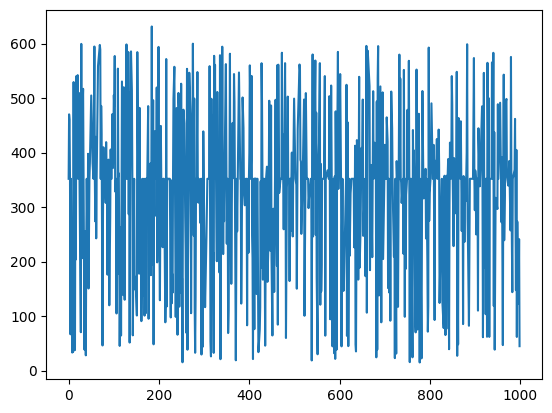

In [ ]:
x=cleaned["Sale_Price"]
plt.plot(x)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cleaned["Sale_Price"]=scaler.fit_transform(cleaned[["Sale_Price"]])

<ipython-input-20-0e99b4ef0e76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["Sale_Price"]=scaler.fit_transform(cleaned[["Sale_Price"]])


In [ ]:
print(cleaned["Sale_Price"])

0      0.546678
1      0.738495
2      0.722204
3      0.546678
4      0.083874
         ...   
993    0.419371
995    0.175067
996    0.191991
997    0.367041
998    0.048517
Name: Sale_Price, Length: 743, dtype: float64


In [ ]:
def tofloat(x):
   return float(x)

cleaned["Sale_Price"]=cleaned["Sale_Price"].apply(tofloat)

<ipython-input-23-ad5713bc0638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["Sale_Price"]=cleaned["Sale_Price"].apply(tofloat)


In [ ]:
print(cleaned["Sale_Price"])

0      0.546678
1      0.738495
2      0.722204
3      0.546678
4      0.083874
         ...   
993    0.419371
995    0.175067
996    0.191991
997    0.367041
998    0.048517
Name: Sale_Price, Length: 743, dtype: float64


In [ ]:
print(cleaned)

    Product_ID Product_Name     Category    Supplier  Purchase_Price  \
0        P0001       Doodad     Clothing  Supplier D          339.75   
1        P0002    Doohickey     Clothing  Supplier C          253.17   
2        P0003  Thingamajig     Clothing  Supplier B          253.17   
3        P0004    Doohickey     Clothing  Supplier A          253.17   
4        P0005    Doohickey         Toys  Supplier E          228.75   
..         ...          ...          ...         ...             ...   
993      P0994       Gadget     Clothing  Supplier A          253.17   
995      P0996       Gadget  Electronics  Supplier D          350.37   
996      P0997       Widget         Toys  Supplier E          117.17   
997      P0998       Widget  Electronics  Supplier C          301.70   
998      P0999       Doodad         Toys  Supplier B          139.67   

     Sale_Price  Quantity_In_Stock  Reorder_Level  Units_On_Order  \
0      0.546678              588.0          292.0           161.0 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(cleaned[["Discontinued"]])

In [ ]:
print(one_hot_encoded)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
cleaned.drop("Discontinued",axis=1,inplace=True)

<ipython-input-29-60a2b22f4f98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.drop("Discontinued",axis=1,inplace=True)


In [ ]:
one_hot=pd.DataFrame(one_hot_encoded)
print(one_hot)

       0    1
0    0.0  1.0
1    0.0  1.0
2    0.0  1.0
3    1.0  0.0
4    0.0  1.0
..   ...  ...
738  1.0  0.0
739  1.0  0.0
740  1.0  0.0
741  1.0  0.0
742  1.0  0.0

[743 rows x 2 columns]


In [ ]:
one_hot.drop(1,axis=1,inplace=True)

In [ ]:
print(one_hot)

       0
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
..   ...
738  1.0
739  1.0
740  1.0
741  1.0
742  1.0

[743 rows x 1 columns]


In [ ]:
print(cleaned)

    Product_ID Product_Name     Category    Supplier  Purchase_Price  \
0        P0001       Doodad     Clothing  Supplier D          339.75   
1        P0002    Doohickey     Clothing  Supplier C          253.17   
2        P0003  Thingamajig     Clothing  Supplier B          253.17   
3        P0004    Doohickey     Clothing  Supplier A          253.17   
4        P0005    Doohickey         Toys  Supplier E          228.75   
..         ...          ...          ...         ...             ...   
993      P0994       Gadget     Clothing  Supplier A          253.17   
995      P0996       Gadget  Electronics  Supplier D          350.37   
996      P0997       Widget         Toys  Supplier E          117.17   
997      P0998       Widget  Electronics  Supplier C          301.70   
998      P0999       Doodad         Toys  Supplier B          139.67   

     Sale_Price  Quantity_In_Stock  Reorder_Level  Units_On_Order  
0      0.546678              588.0          292.0           161.0  

In [ ]:
cleaned.reset_index(drop=True)

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order
0,P0001,Doodad,Clothing,Supplier D,339.75,0.546678,588.0,292.0,161.0
1,P0002,Doohickey,Clothing,Supplier C,253.17,0.738495,348.0,114.0,70.0
2,P0003,Thingamajig,Clothing,Supplier B,253.17,0.722204,146.0,199.0,163.0
3,P0004,Doohickey,Clothing,Supplier A,253.17,0.546678,66.0,13.0,145.0
4,P0005,Doohickey,Toys,Supplier E,228.75,0.083874,903.0,271.0,37.0
...,...,...,...,...,...,...,...,...,...
738,P0994,Gadget,Clothing,Supplier A,253.17,0.419371,831.0,433.0,76.0
739,P0996,Gadget,Electronics,Supplier D,350.37,0.175067,186.0,82.0,14.0
740,P0997,Widget,Toys,Supplier E,117.17,0.191991,497.0,428.0,35.0
741,P0998,Widget,Electronics,Supplier C,301.70,0.367041,441.0,72.0,62.0


In [ ]:
one_hot.shape

(743, 1)

In [ ]:
cleaned.shape

(743, 9)

In [ ]:
df=pd.concat([cleaned.reset_index(drop=True),one_hot.reset_index(drop=True)],axis=1)

In [ ]:
print(df)

    Product_ID Product_Name     Category    Supplier  Purchase_Price  \
0        P0001       Doodad     Clothing  Supplier D          339.75   
1        P0002    Doohickey     Clothing  Supplier C          253.17   
2        P0003  Thingamajig     Clothing  Supplier B          253.17   
3        P0004    Doohickey     Clothing  Supplier A          253.17   
4        P0005    Doohickey         Toys  Supplier E          228.75   
..         ...          ...          ...         ...             ...   
738      P0994       Gadget     Clothing  Supplier A          253.17   
739      P0996       Gadget  Electronics  Supplier D          350.37   
740      P0997       Widget         Toys  Supplier E          117.17   
741      P0998       Widget  Electronics  Supplier C          301.70   
742      P0999       Doodad         Toys  Supplier B          139.67   

     Sale_Price  Quantity_In_Stock  Reorder_Level  Units_On_Order    0  
0      0.546678              588.0          292.0           16

In [ ]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>